# ЗАДАНИЕ 3. ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ И ОТБОР ПРИЗНАКОВ

In [18]:
import matplotlib.pyplot as plt
from numpy import set_printoptions
import numpy as np
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [9]:
filename = 'data/tripadvisor_review.csv'
namesArray = ['User ID', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6',
              'Category 7', 'Category 8', 'Category 9', 'Category 10']
data = read_csv(filename, names=namesArray)

data["User ID"] = data["User ID"].replace({"User ": ""}, regex=True)
data["User ID"] = data["User ID"].astype(int)
data.head(15)

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
5,6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66
6,7,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22
7,8,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88
8,9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54
9,10,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12


In [8]:
# 3.	Сохраните в переменную array значения признаков, обратившись к атрибуту values
array = data.values

# 4.
X = array[:, 0:10]  # Факторные признаки
Y = array[:, 10]    # Результативный признак
print(f"X: \n{X[0:2,:8]}")
print(f"Y: \n{Y[0:2]}")

X: 
[[1.   0.93 1.8  2.29 0.62 0.8  2.42 3.19]
 [2.   1.02 2.2  2.66 0.64 1.42 3.18 3.21]]
Y: 
[2.42 2.32]


In [10]:
# 5. cоздать объект с помощью функции MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0,1))

# 6. обучить его на факторных признаках и преобразовать данные с помощью функции fit_transform()
X_MinMaxScaler = scaler.fit_transform(X)

# 7. формат представления данных вида 3 знака после запятой
set_printoptions(precision=3)

# 8. первые 5 строк преобразованных данных
print(X_MinMaxScaler[0:5,:8])

[[0.    0.205 0.495 0.619 0.143 0.228 0.63  0.6  ]
 [0.001 0.236 0.604 0.725 0.149 0.42  0.84  1.   ]
 [0.002 0.306 0.22  0.117 0.116 0.056 0.387 0.4  ]
 [0.003 0.038 0.495 0.046 0.128 0.123 0.381 0.4  ]
 [0.004 0.059 0.33  0.301 0.128 0.457 0.519 0.4  ]]


In [12]:
def show_hist_diff(data_1, title_1, xlabel_1, data_2, title_2, xlabel_2):
  # Строим два графика в одной строке
  plt.figure(figsize=(10, 3))

  plt.subplot(1, 2, 1)
  plt.grid(True)
  plt.hist(data_1, bins=10, edgecolor='k', color='#9042f5', alpha=0.7)
  plt.title(title_1)
  plt.xlabel(xlabel_1)
  plt.ylabel("Частота")


  plt.subplot(1, 2, 2)
  plt.hist(data_2, bins=10, edgecolor='k', color='#f5a442', alpha=0.7)
  plt.title(title_2)
  plt.xlabel(xlabel_2)
  plt.ylabel("Частота")
  plt.grid(True)

  plt.tight_layout()
  plt.show()

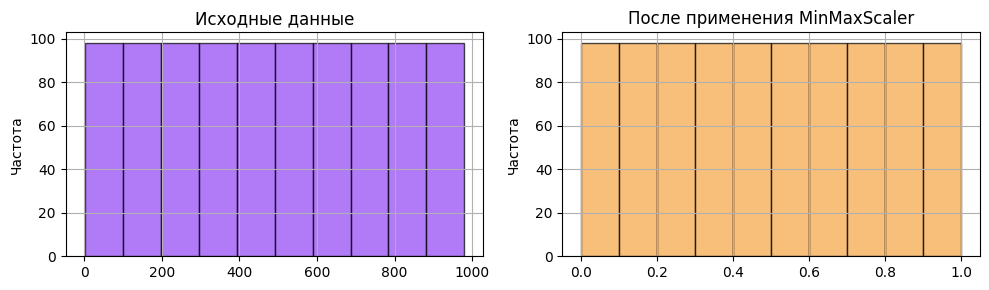

In [13]:
X_source_row = [row[0] for row in X]
X_MinMaxScaler_row = [row[0] for row in X_MinMaxScaler]

show_hist_diff(X_source_row, "Исходные данные","",
               X_MinMaxScaler_row, "После применения MinMaxScaler", "" )

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X_standardized = scaler.transform(X)
print(X_standardized[0:5,:8])

[[-1.73   0.113  0.936  1.62   0.313 -0.32   1.07   1.159]
 [-1.727  0.388  1.773  2.089  0.384  1.098  2.48   3.716]
 [-1.723  1.    -1.156 -0.6   -0.009 -1.6   -0.562 -0.12 ]
 [-1.72  -1.356  0.936 -0.918  0.134 -1.097 -0.599 -0.12 ]
 [-1.716 -1.173 -0.319  0.211  0.134  1.373  0.328 -0.12 ]]


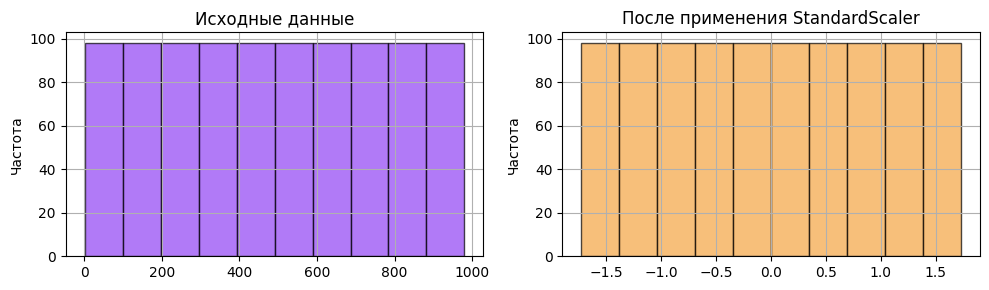

In [15]:
X_standardized_row = [row[0] for row in X_standardized]

show_hist_diff(X_source_row, "Исходные данные", "",
               X_standardized_row, "После применения StandardScaler", "")

In [16]:
normaler = Normalizer().fit(X)
X_Normalizer = normaler.fit_transform(X)
print(X_Normalizer[0:1,:])

[[0.161 0.15  0.29  0.369 0.1   0.129 0.39  0.514 0.45  0.293]]


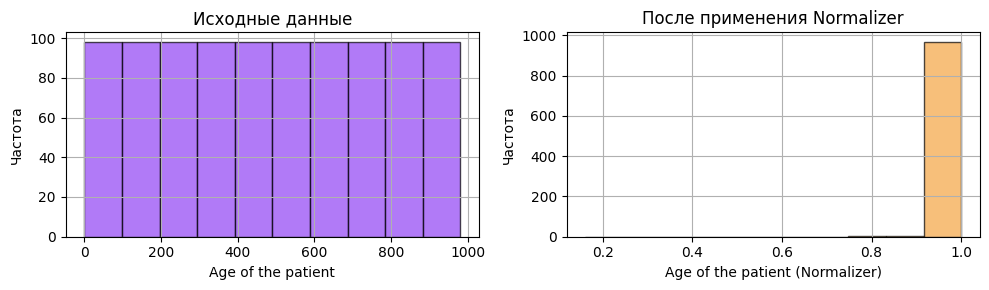

In [17]:
X_Normalizer_row = [row[0] for row in X_Normalizer]
show_hist_diff(X_source_row, "Исходные данные", "Age of the patient",
               X_Normalizer_row, "После применения Normalizer", "Age of the patient (Normalizer)")

In [20]:
X_np = np.array(X_Normalizer)

column_index = 3
column_sum = np.sum(X_np[1, :])
column_sum

2.939253436220129

In [21]:
binarizer = Binarizer(threshold=0.0).fit(X)
rescaledX = binarizer.fit_transform(X)
print(rescaledX[0:5,:])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [22]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X,Y)
print(fit.scores_)

[ 1.046  2.083  1.066  7.295  3.8    2.379  5.521 21.234  1.541  1.536]


In [25]:
X_selected = fit.transform(X)
print(X_selected[0:5, :])

[[2.29 0.62 2.42 3.19]
 [2.66 0.64 3.18 3.21]
 [0.54 0.53 1.54 3.18]
 [0.29 0.57 1.52 3.18]
 [1.18 0.57 2.02 3.18]]


In [26]:
# 13
model = LogisticRegression()

# 14
rfe = RFE(model, n_features_to_select=3)

# 15
fit = rfe.fit(X, Y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [27]:
# 16
print("Число отобранных признаков:", fit.n_features_)

# 17
print("Отобранные признаки:", fit.support_)

# 18
print("Ранги признаков:", fit.ranking_)

AttributeError: 'SelectKBest' object has no attribute 'n_features_'

## 19

In [28]:
# 19
X_rfe = rfe.transform(X)
print(X_rfe[:5])

AttributeError: 'RFE' object has no attribute 'support_'

In [29]:
pca = PCA(n_components=3)
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
print("Доля дисперсии:", explained_variance)

Доля объясненной дисперсии: [1.000e+00 9.039e-06 3.902e-06]


In [30]:
np.set_printoptions(suppress=True)
components = pca.components_
print("Компонентные нагрузки:\n", components)

Компонентные нагрузки:
 [[-1.     0.     0.     0.    -0.     0.    -0.    -0.    -0.    -0.   ]
 [ 0.     0.005  0.075  0.872  0.046  0.266  0.399  0.007 -0.025 -0.019]
 [-0.    -0.043  0.393 -0.457  0.114  0.447  0.624 -0.001  0.017  0.177]]


In [31]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
feature_importance = model.feature_importances_
print("Значения критерия информативности:", feature_importance)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.